<a href="https://colab.research.google.com/github/janjuatest/Kaggle/blob/main/HousingPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is about the Kaggle contest for House Prices
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=data_description.txt

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')

Read the training csv file avaiable at Kaggle

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There are 81 columns including the traget column of Sale Price. We have a total of 1460 data points

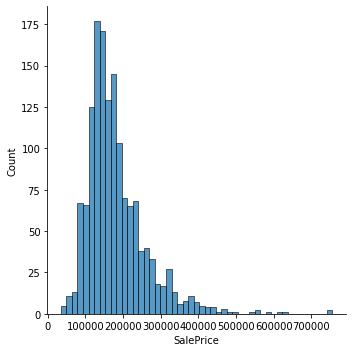

In [5]:
sns.displot(df['SalePrice'])

As can be seen above there are a few outliers in the prices so we can limit the model for SalePrice below 500,000 for more effective machine learning


In [6]:
len(df[df['SalePrice']>500000])

9

There are only 9 houses with prices above this value so they cna be safely discarded

In [7]:
df=df[df['SalePrice']<500000]

In [8]:
len(df)

1451

We have successfully removed the outliers and kept most of the data 

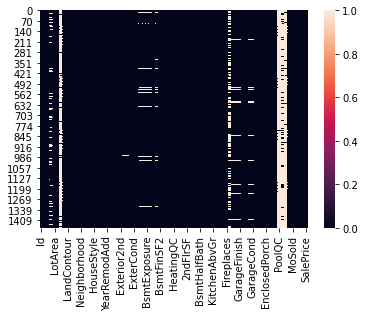

In [9]:
sns.heatmap(df.isnull())

Now lets look at the missing values

There are columns like PoolQC etc that seems mostly empty


In [10]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           1445
MiscFeature      1397
Alley            1360
Fence            1171
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

The first three columns can be removed

In [11]:
df.drop(columns=['PoolQC','MiscFeature','Alley']).isnull().sum().sort_values(ascending=False)

Fence            1171
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
                 ... 
CentralAir          0
HeatingQC           0
SaleCondition       0
TotalBsmtSF         0
Id                  0
Length: 78, dtype: int64

In [12]:
df.drop(columns=['PoolQC','MiscFeature','Alley'],inplace=True)

In [13]:
df['Fence'].value_counts()

MnPrv    156
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

From Kaggle the description of the columns is:
Fence: Fence quality
		   GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

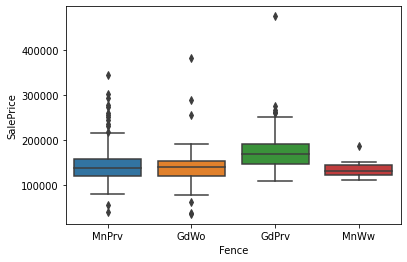

In [14]:
sns.boxplot(x=df['Fence'],y=df['SalePrice'])

From above, most categories have similar distribution of prices so lets drop the column

In [15]:
df.drop(columns=['Fence'],inplace=True)

In [16]:
df.isnull().sum().sort_values(ascending=False)

FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
                ... 
CentralAir         0
HeatingQC          0
SaleCondition      0
TotalBsmtSF        0
Id                 0
Length: 77, dtype: int64

In [17]:
df['FireplaceQu'].value_counts()

Gd    374
TA    311
Fa     33
Ex     23
Po     20
Name: FireplaceQu, dtype: int64

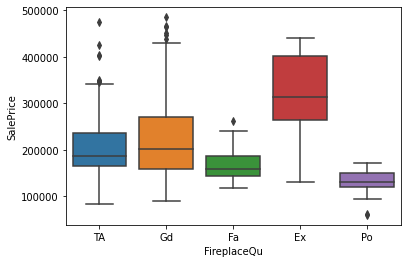

In [18]:
sns.boxplot(x=df['FireplaceQu'],y=df['SalePrice'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

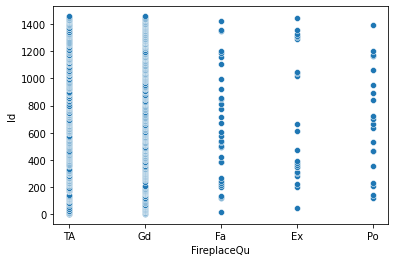

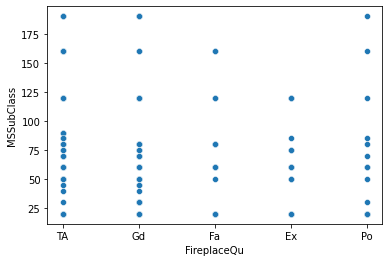

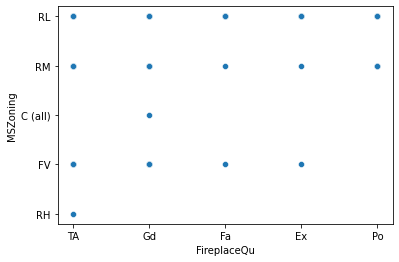

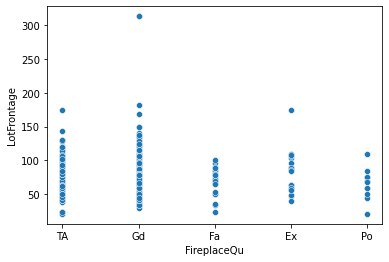

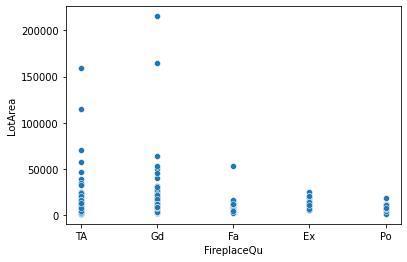

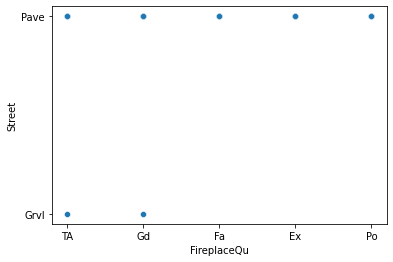

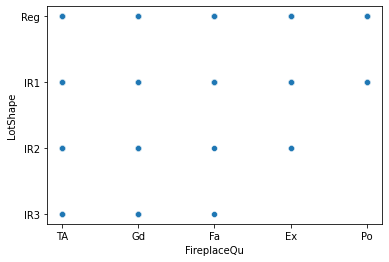

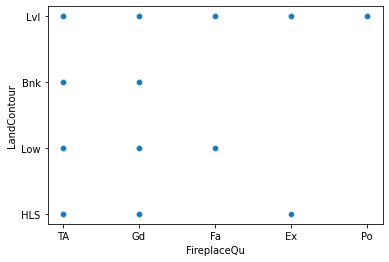

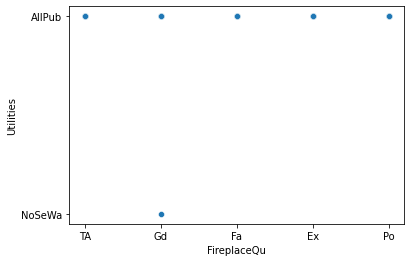

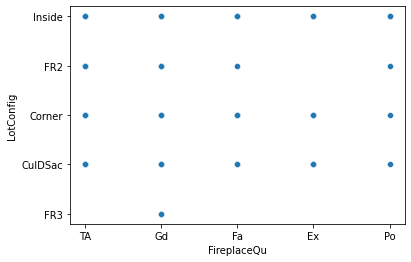

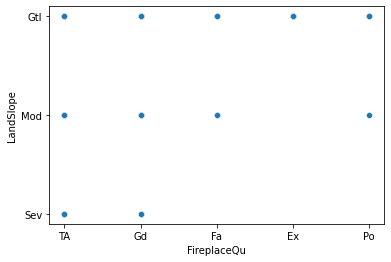

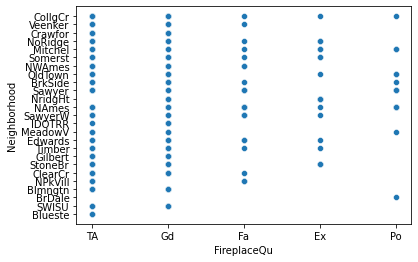

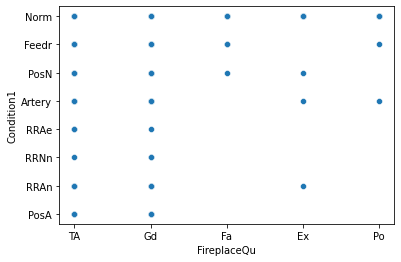

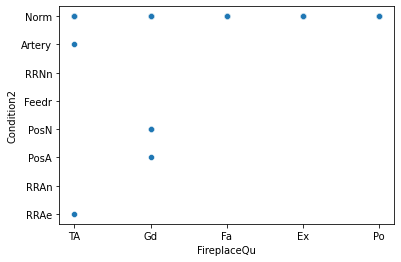

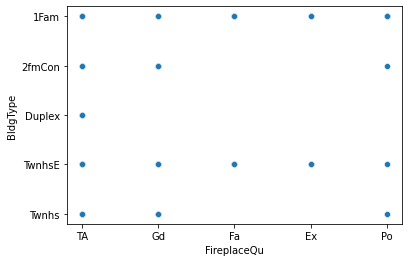

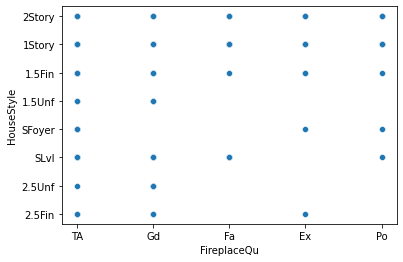

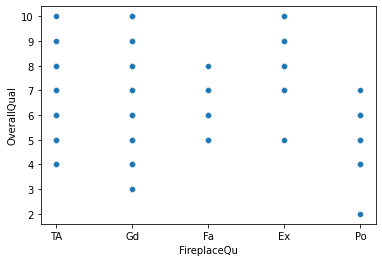

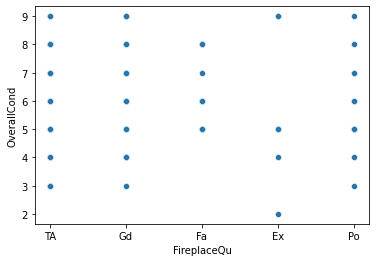

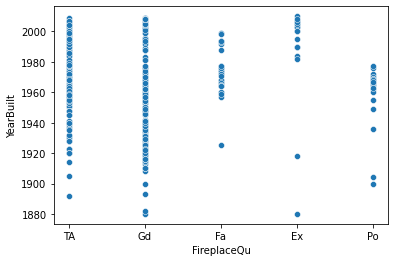

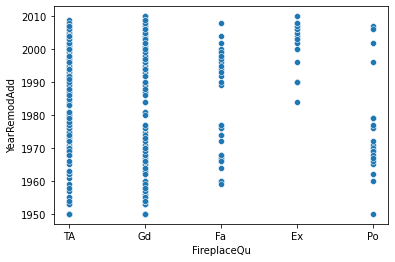

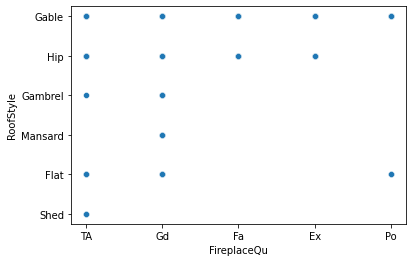

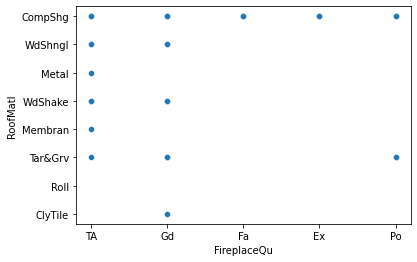

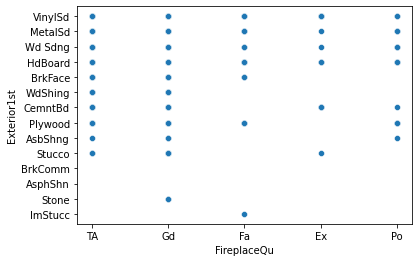

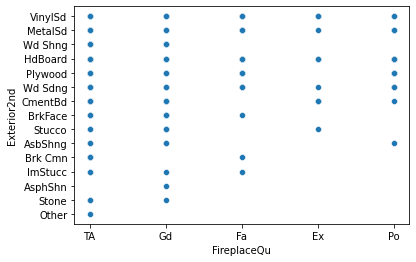

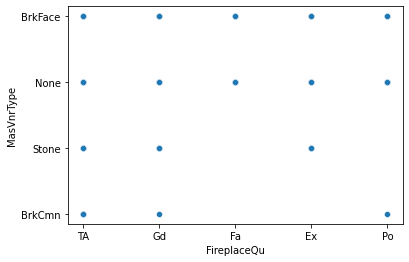

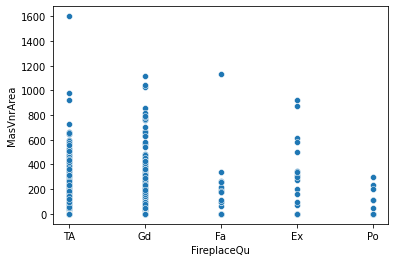

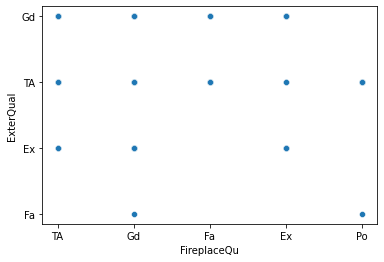

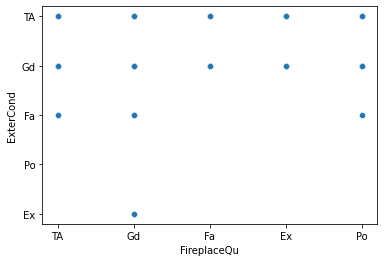

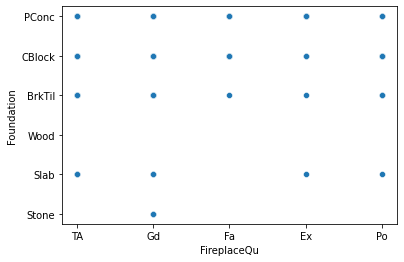

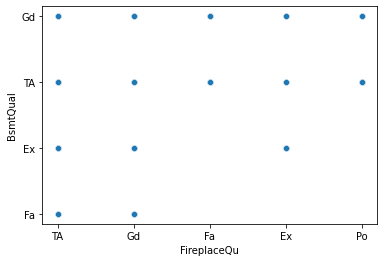

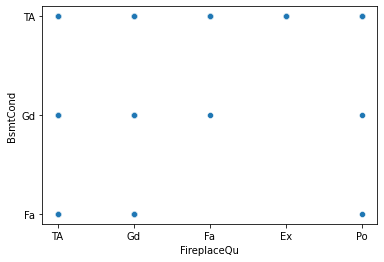

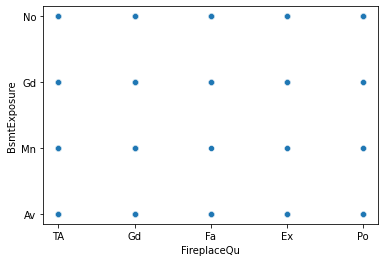

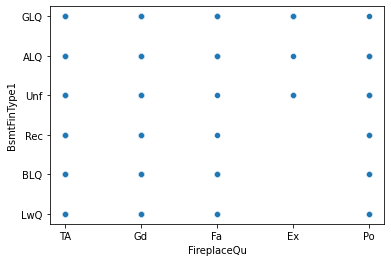

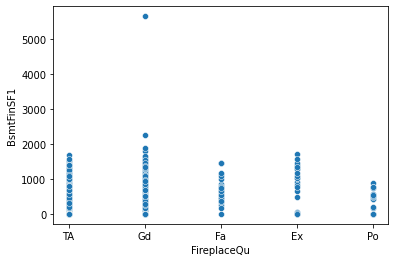

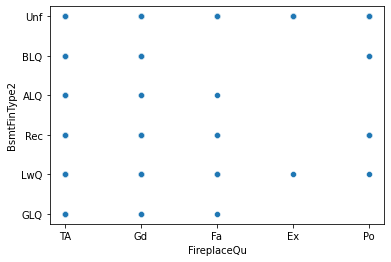

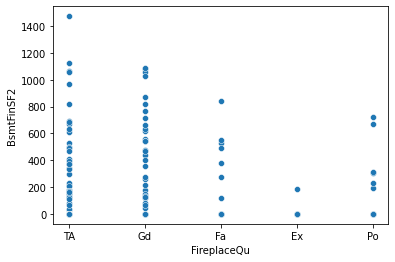

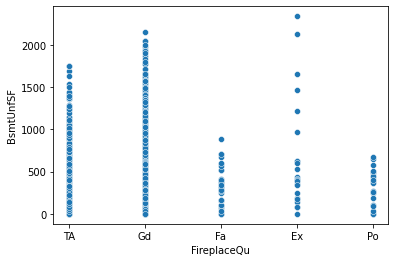

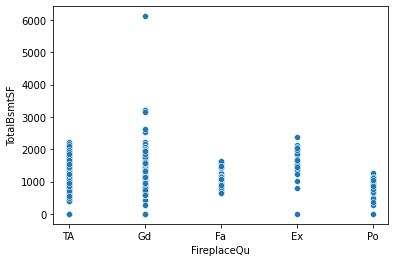

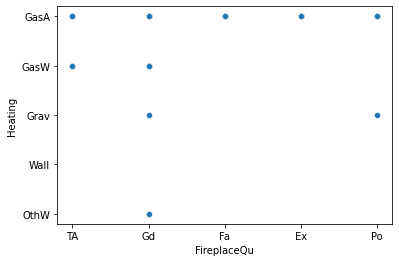

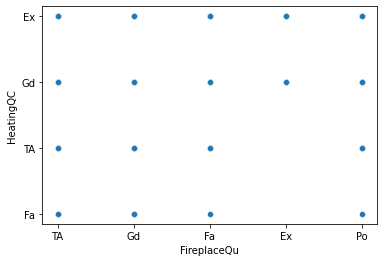

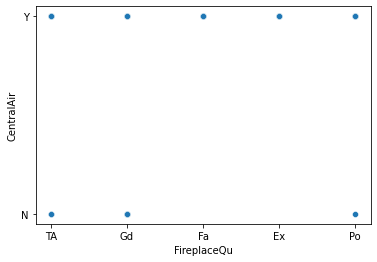

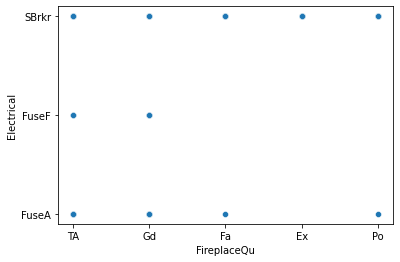

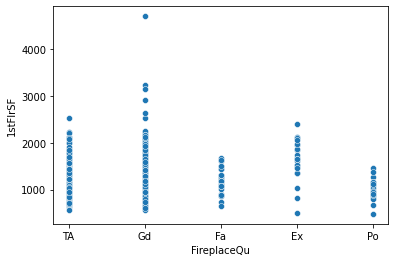

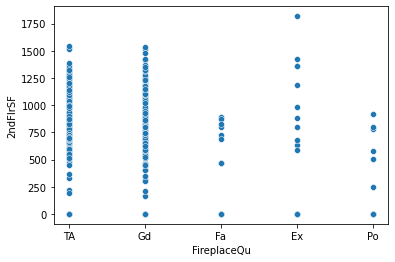

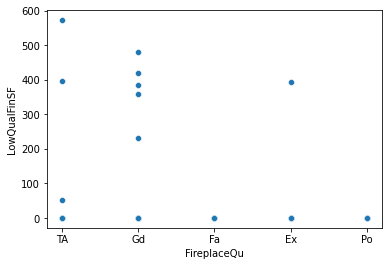

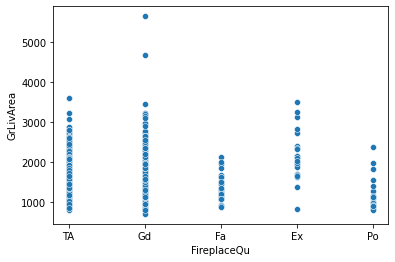

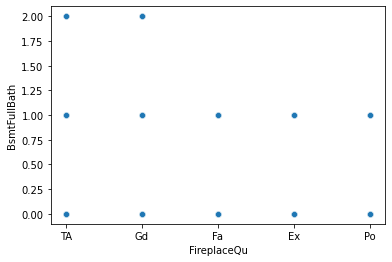

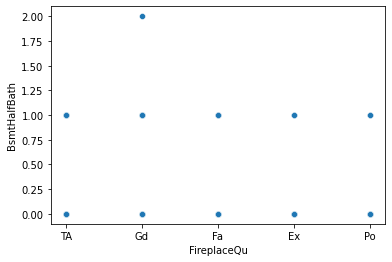

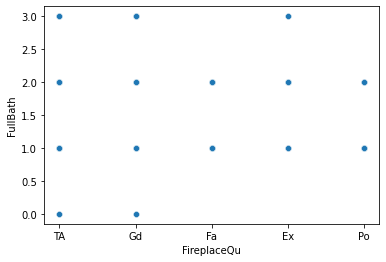

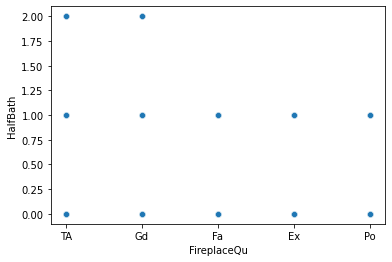

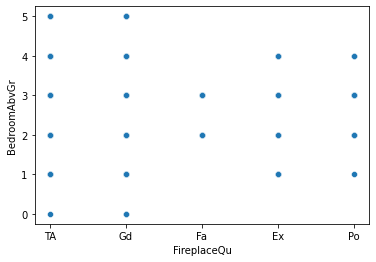

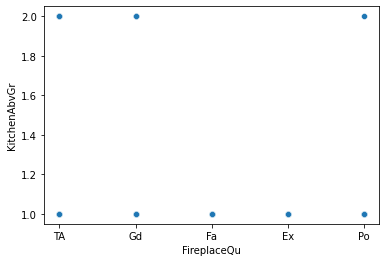

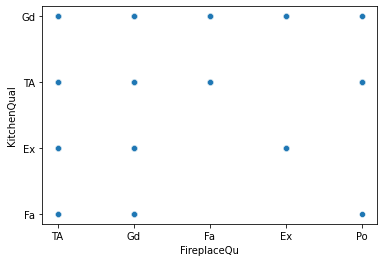

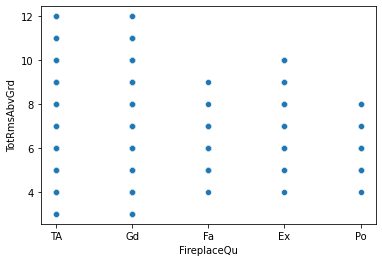

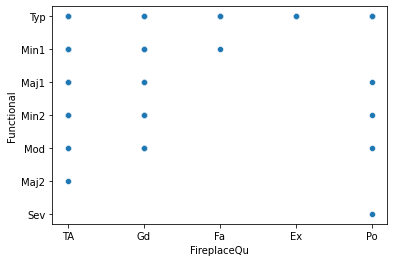

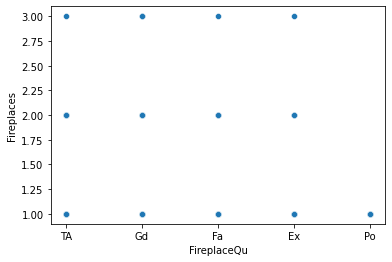

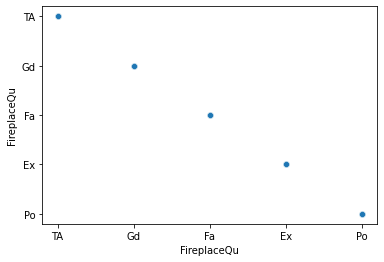

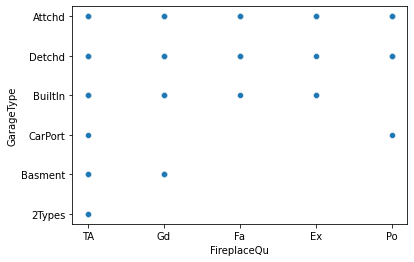

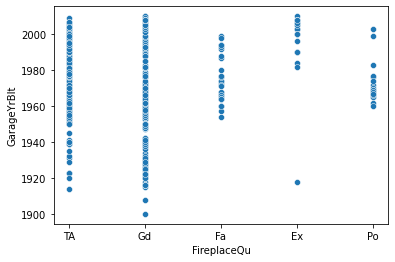

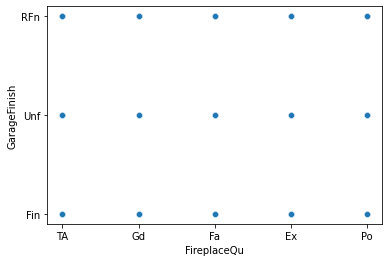

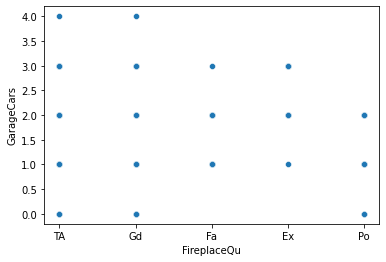

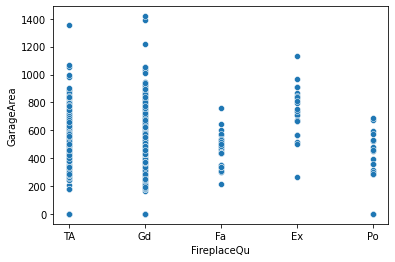

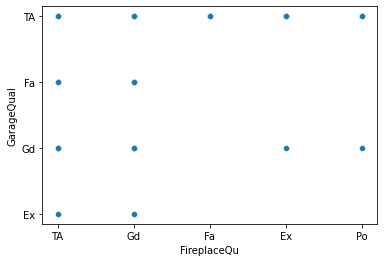

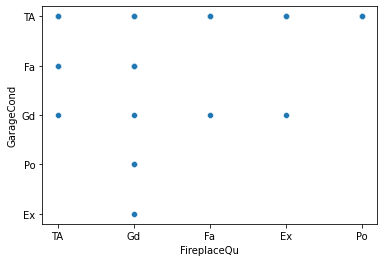

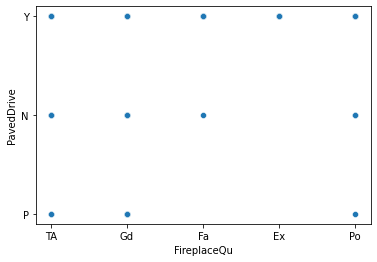

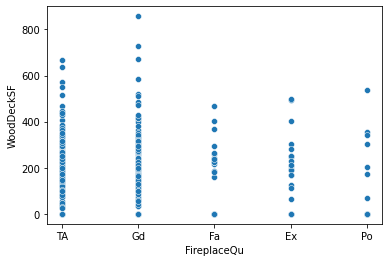

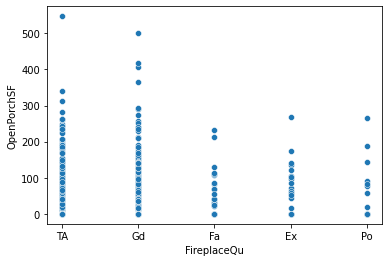

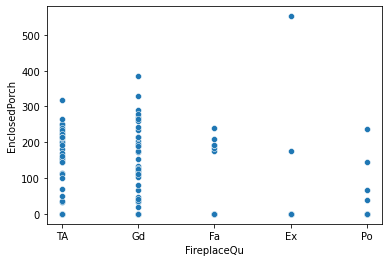

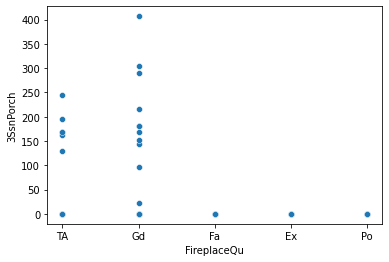

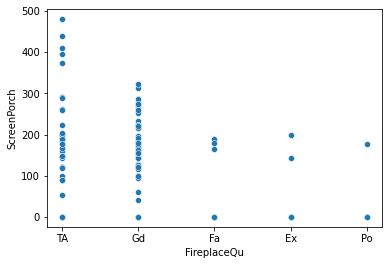

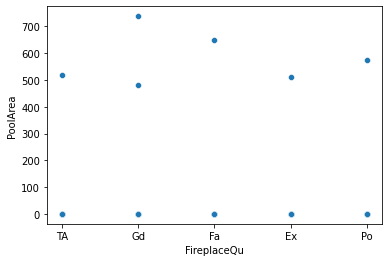

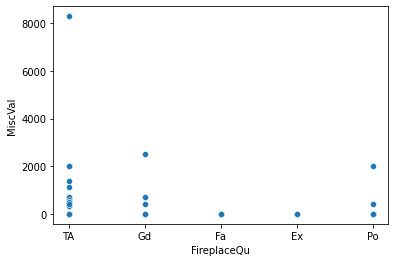

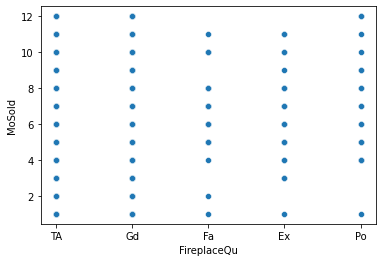

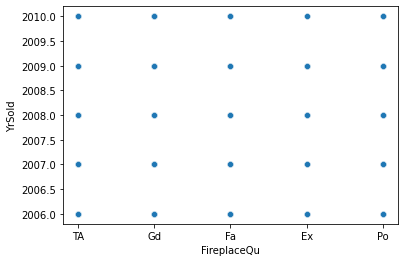

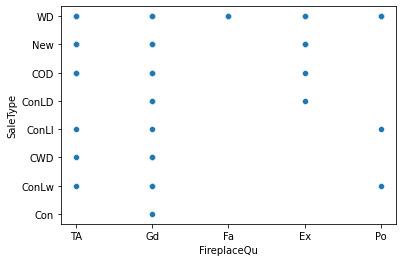

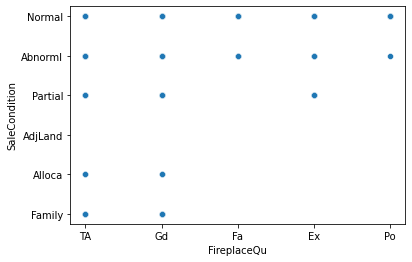

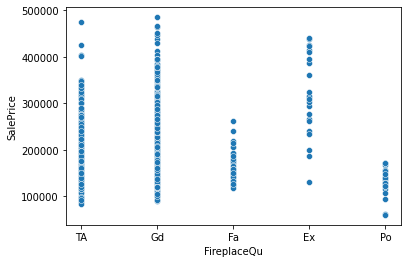

In [19]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.scatterplot(x=df['FireplaceQu'],y=df[col])

In [20]:
def fillfire(pair):
  condition=pair[0]
  fireplace=pair[1]
  if pd.isnull(fireplace):
    if condition=='RRAe':
      return "TA"
    elif condition=='PosA':
      return "Gd"
    else:
      return 'Gd'
  else:
    return fireplace


WE will fill the FireplaceQu column nulls by looking at the condition2 column



In [21]:
df[['Condition2','FireplaceQu']]

,Condition2,FireplaceQu
0,Norm,NaN
1,Norm,TA
2,Norm,TA
3,Norm,Gd
4,Norm,TA
...,...,...
1455,Norm,TA
1456,Norm,TA
1457,Norm,Gd
1458,Norm,NaN


In [22]:
df['FireplaceQu']=df[['Condition2','FireplaceQu']].apply(fillfire,axis=1)

In [23]:
df['FireplaceQu'].value_counts()

Gd    1064
TA     311
Fa      33
Ex      23
Po      20
Name: FireplaceQu, dtype: int64

The nulls in FireplaceQU have been filled

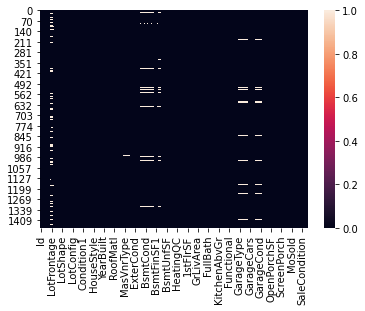

In [24]:
sns.heatmap(df.isnull())

In [25]:
df.isnull().sum().sort_values(ascending=False)

LotFrontage     259
GarageFinish     81
GarageType       81
GarageCond       81
GarageQual       81
               ... 
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
Id                0
Length: 77, dtype: int64

Now lets look at LotFrontage column with most nulls

In [26]:
df['LotFrontage'].mean()

69.83305369127517

In [27]:
def fillLF (frontage):
  if pd.isnull(frontage):
    return 69.83
  else:
    return frontage


In [28]:
df['LotFrontage']=df['LotFrontage'].apply(fillLF)

We will fill the nulls by the average value in this case

In [30]:
df['LotFrontage'].value_counts()

69.83     259
60.00     143
70.00      70
80.00      69
50.00      57
         ... 
106.00      1
38.00       1
138.00      1
140.00      1
137.00      1
Name: LotFrontage, Length: 110, dtype: int64

In [31]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [34]:
df.isnull().sum().sort_values(ascending=False)

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCond      81
GarageQual      81
                ..
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Id               0
Length: 77, dtype: int64

In [36]:
df.isnull().sum().sort_values(ascending=False).head(20)

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCond      81
GarageQual      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrType       8
MasVnrArea       8
Electrical       1
RoofMatl         0
RoofStyle        0
SalePrice        0
Exterior1st      0
Exterior2nd      0
YearBuilt        0
ExterQual        0
dtype: int64

In [37]:
len(df)

1451

In [38]:
len(df.dropna())

1329

The rest of the nulls can be safely dropped

In [39]:
df.dropna(inplace=True)

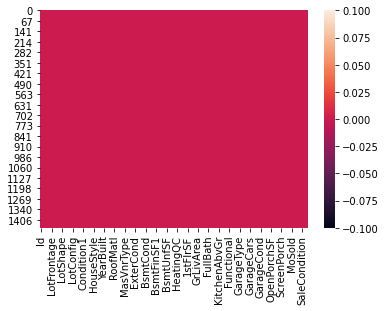

In [40]:
sns.heatmap(df.isnull())

Looks good

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1329 non-null   int64  
 1   MSSubClass     1329 non-null   int64  
 2   MSZoning       1329 non-null   object 
 3   LotFrontage    1329 non-null   float64
 4   LotArea        1329 non-null   int64  
 5   Street         1329 non-null   object 
 6   LotShape       1329 non-null   object 
 7   LandContour    1329 non-null   object 
 8   Utilities      1329 non-null   object 
 9   LotConfig      1329 non-null   object 
 10  LandSlope      1329 non-null   object 
 11  Neighborhood   1329 non-null   object 
 12  Condition1     1329 non-null   object 
 13  Condition2     1329 non-null   object 
 14  BldgType       1329 non-null   object 
 15  HouseStyle     1329 non-null   object 
 16  OverallQual    1329 non-null   int64  
 17  OverallCond    1329 non-null   int64  
 18  YearBuil

Now lets start FEATURE ENGINEERING

In [42]:
df['SaleCondition'].value_counts()

Normal     1100
Partial     116
Abnorml      85
Family       20
Alloca        7
AdjLand       1
Name: SaleCondition, dtype: int64

Lets merge the last two categories into normal

In [43]:
df['SaleCondition']=df['SaleCondition'].replace(['Alloca','AdjLand'],'Normal')

In [44]:
df['SaleCondition'].value_counts()

Normal     1108
Partial     116
Abnorml      85
Family       20
Name: SaleCondition, dtype: int64

In [45]:
df=pd.get_dummies(df,columns=['SaleCondition'],drop_first=True)

The above will convert the categorical column into boolean

In [46]:
df['SaleType'].value_counts()

WD       1153
New       113
COD        42
ConLD       6
ConLI       4
CWD         4
ConLw       4
Con         2
Oth         1
Name: SaleType, dtype: int64

In [47]:
df['SaleType']=df['SaleType'].replace(['ConLD','ConLw','ConLI','CWD','Con','Oth'],'WD')

In [48]:
df['SaleType'].value_counts()

WD     1174
New     113
COD      42
Name: SaleType, dtype: int64

In [49]:
df=pd.get_dummies(df,columns=['SaleType'],drop_first=True)

In [51]:
df=pd.get_dummies(df,columns=['FireplaceQu'],drop_first=True)

GarageQual     1329 non-null   object 
 63  GarageCond     1329 non-null   object 
 64  PavedDrive     1329 non-null   object 

In [52]:
df['GarageQual'].value_counts()

TA    1261
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [53]:
df['GarageQual']=df['GarageQual'].replace(['Po','Ex'],'TA')

In [54]:
df['GarageQual'].value_counts()

TA    1267
Fa      48
Gd      14
Name: GarageQual, dtype: int64

In [55]:
df=pd.get_dummies(df,columns=['GarageQual'],drop_first=True)

In [56]:
df['GarageCond'].value_counts()

TA    1278
Fa      33
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [57]:
df['GarageCond']=df['GarageCond'].replace(['Gd','Po','Ex'],'TA')

In [58]:
df=pd.get_dummies(df,columns=['GarageCond'],drop_first=True)

In [59]:
df['PavedDrive'].value_counts()

Y    1248
N      54
P      27
Name: PavedDrive, dtype: int64

In [60]:
df=pd.get_dummies(df,columns=['PavedDrive'],drop_first=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1459
Data columns (total 85 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     1329 non-null   int64  
 1   MSSubClass             1329 non-null   int64  
 2   MSZoning               1329 non-null   object 
 3   LotFrontage            1329 non-null   float64
 4   LotArea                1329 non-null   int64  
 5   Street                 1329 non-null   object 
 6   LotShape               1329 non-null   object 
 7   LandContour            1329 non-null   object 
 8   Utilities              1329 non-null   object 
 9   LotConfig              1329 non-null   object 
 10  LandSlope              1329 non-null   object 
 11  Neighborhood           1329 non-null   object 
 12  Condition1             1329 non-null   object 
 13  Condition2             1329 non-null   object 
 14  BldgType               1329 non-null   object 
 15  Hous

In [62]:
df['GarageFinish'].value_counts()

Unf    580
RFn    412
Fin    337
Name: GarageFinish, dtype: int64

In [63]:
df=pd.get_dummies(df,columns=['GarageFinish'],drop_first=True)

In [64]:
df['GarageType'].value_counts()

Attchd     846
Detchd     369
BuiltIn     82
Basment     19
CarPort      7
2Types       6
Name: GarageType, dtype: int64

In [65]:
df['GarageType']=df['GarageType'].replace(['CarPort','2Types'],'Attchd')

In [66]:
df['GarageType'].value_counts()

Attchd     859
Detchd     369
BuiltIn     82
Basment     19
Name: GarageType, dtype: int64

In [68]:
df=pd.get_dummies(df,columns=['GarageType'],drop_first=True)

In [69]:
df['Functional'].value_counts()

Typ     1246
Min2      30
Min1      28
Mod       10
Maj1      10
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [70]:
df['Functional']=df['Functional'].replace(['Mod','Maj1','Maj2','Sev'],'Typ')

In [71]:
df=pd.get_dummies(df,columns=['Functional'],drop_first=True)

In [72]:
df['KitchenQual'].value_counts()

TA    650
Gd    567
Ex     89
Fa     23
Name: KitchenQual, dtype: int64

In [74]:
df=pd.get_dummies(df,columns=['KitchenQual'],drop_first=True)

Heating                1329 non-null   object 
 39  HeatingQC              1329 non-null   object 
 40  CentralAir             1329 non-null   object 
 41  Electrical 

In [77]:
df['Electrical'].value_counts()

SBrkr    1233
FuseA      76
FuseF      20
Name: Electrical, dtype: int64

In [76]:
df['Electrical']=df['Electrical'].replace(['FuseP','Mix'],'FuseF')

In [78]:
df=pd.get_dummies(df,columns=['Electrical'],drop_first=True)

In [79]:
df['CentralAir'].value_counts()

Y    1268
N      61
Name: CentralAir, dtype: int64

In [80]:
df=pd.get_dummies(df,columns=['CentralAir'],drop_first=True)

In [83]:
df['HeatingQC'].value_counts()

Ex    695
TA    380
Gd    217
Fa     37
Name: HeatingQC, dtype: int64

In [82]:
df['HeatingQC']=df['HeatingQC'].replace(['Po'],'Fa')

In [84]:
df=pd.get_dummies(df,columns=['HeatingQC'],drop_first=True)

In [85]:
df['Heating'].value_counts()

GasA    1309
GasW      16
Grav       3
OthW       1
Name: Heating, dtype: int64

In [86]:
df['Heating']=df['Heating'].replace(['Grav','OthW'],'GasA')

In [87]:
df=pd.get_dummies(df,columns=['Heating'],drop_first=True)